In [6]:
# 전이학습에 대하야 알아봅시다
# 비학습된 Pretrained Network VGG16을 이용해 보는것

from tensorflow.keras.applications import VGG16

In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# ImageDataGenerator 객체 생성
Train_Datagen = ImageDataGenerator(rescale=1/255)
Test_Datagen = ImageDataGenerator(rescale=1/255)

In [9]:
train_dir = './cats_and_dogs_small/train'
test_dir = './cats_and_dogs_small/test'

In [10]:
# ImageDataGenerator 설정

train_generator = Train_Datagen.flow_from_directory(
    train_dir,               # 학습용 이미지를 가져올 폴더
    classes=['cats','dogs'], # cats 폴더의 이미지 label을 0으로 
                             # dogs 폴더의 이미지는 label을 1으로
    target_size=(150,150),   # 이미지 resize
    batch_size=20,           # 한번에 20개의 이미지만 가져와서 학습
    class_mode = 'binary'    # 이진분류인 경우 설정
)


test_generator = Test_Datagen.flow_from_directory(
    test_dir,               # 학습용 이미지를 가져올 폴더
    classes=['cats','dogs'], # cats 폴더의 이미지 label을 0으로 
                             # dogs 폴더의 이미지는 label을 1으로
    target_size=(150,150),   # 이미지 resize
    batch_size=20,           # 한번에 10개의 이미지만 가져와서 학습
    class_mode = 'binary'    # 이진분류인 경우 설정
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
model = Sequential()

model_base = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape = (150,150,3))

model.add(model_base)

# Classification 하는 부분은 우리가 구현해야 합니다
# FC Layer(DNN)의 Input Layer

model.add(Flatten())

# output layer
model.add(Dense(units=1,
               activation='sigmoid'))

In [14]:
# model이 어떻게 동작하는지를 지정
model.compile(optimizer=Adam(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
# 설정을 모두 마치었으면 모델 학습
history = model.fit(train_generator,
             steps_per_epoch = 100,
             epochs = 10,
             verbose= 1,
             validation_data = test_generator,
             validation_steps =50)

Epoch 1/10
100/100 [==============================] - 268s 3s/step - loss: 0.4085 - accuracy: 0.8160 - val_loss: 0.2170 - val_accuracy: 0.9010
Epoch 2/10
100/100 [==============================] - 263s 3s/step - loss: 0.1835 - accuracy: 0.9270 - val_loss: 0.1942 - val_accuracy: 0.9120
Epoch 3/10
100/100 [==============================] - 262s 3s/step - loss: 0.1996 - accuracy: 0.9195 - val_loss: 0.3866 - val_accuracy: 0.8600
Epoch 4/10
100/100 [==============================] - 263s 3s/step - loss: 0.1140 - accuracy: 0.9640 - val_loss: 0.2972 - val_accuracy: 0.8910
Epoch 5/10
100/100 [==============================] - 265s 3s/step - loss: 0.0307 - accuracy: 0.9880 - val_loss: 0.3059 - val_accuracy: 0.9140
Epoch 6/10
100/100 [==============================] - 263s 3s/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.3277 - val_accuracy: 0.9170
Epoch 7/10
100/100 [==============================] - 263s 3s/step - loss: 0.0208 - accuracy: 0.9925 - val_loss: 0.4621 - val_accuracy: 0.8840

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1)                 8193      
                                                                 
Total params: 14,722,881
Trainable params: 14,722,881
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.evaluate(test_generator)

50/50 [==============================] - 27s 532ms/step - loss: 0.2834 - accuracy: 0.9230


[0.28341880440711975, 0.9229999780654907]

In [18]:
import matplotlib.pyplot as plt

In [19]:
acc = history.history['accuracy']
loss= history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

In [20]:
epochs = range(len(acc))

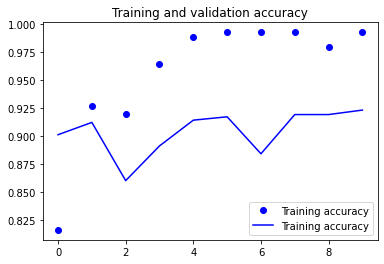

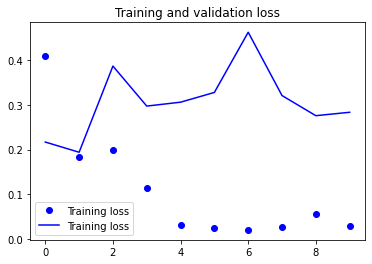

In [21]:
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Training accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()